# ----Init------

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## --------Bitcoin Init---------

In [2]:
dfBitcoin = pd.read_csv('../dataset/Bitcoin/daily/Bitcoin_2010_2024.csv')

# print ("Preview of the data:")
# print (df.head())
dfBitcoin['Date'] = pd.to_datetime(dfBitcoin['Start'])

dfBitcoin = dfBitcoin.drop(['Start', 'End'], axis=1)
dfBitcoin.set_index('Date', inplace=True)

print ("After data:")
print (dfBitcoin.tail())
# print ("data.describe:")
# print (dfBitcoin.describe())

After data:
              Open    High     Low   Close  Volume  Market Cap
Date                                                          
2010-07-31  0.0679  0.0679  0.0679  0.0679     0.0         0.0
2010-07-30  0.0627  0.0627  0.0627  0.0627     0.0         0.0
2010-07-29  0.0699  0.0699  0.0699  0.0699     0.0         0.0
2010-07-28  0.0589  0.0589  0.0589  0.0589     0.0         0.0
2010-07-27  0.0600  0.0600  0.0600  0.0600     0.0         0.0


# -----Daily Bitcoin Different -------


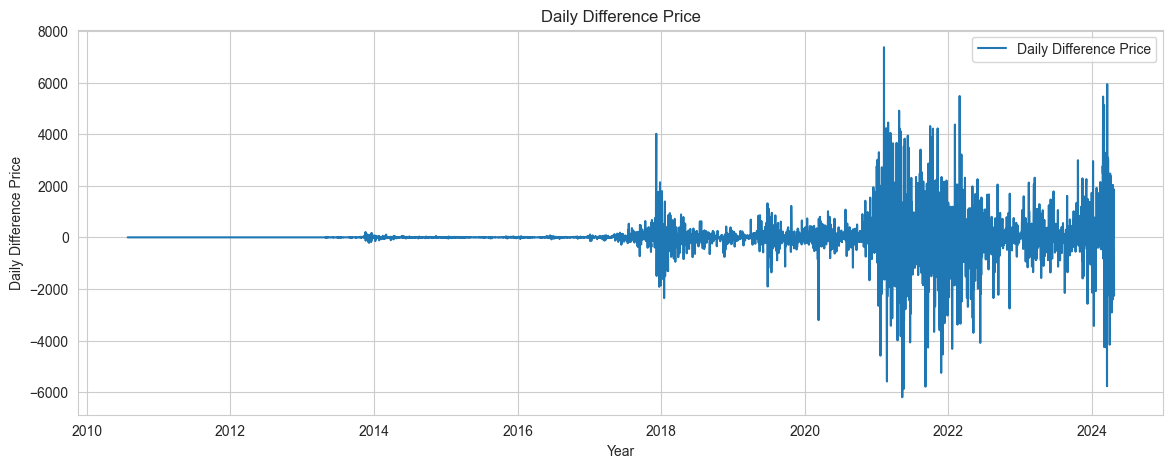

In [3]:

plt.figure(figsize=(14, 5))
# plt.plot(df['Close'], label= 'Close Price')
plt.plot( dfBitcoin['Close'] - dfBitcoin['Open'], label= 'Daily Difference Price')
plt.title('Daily Difference Price')
plt.xlabel('Year')
plt.ylabel('Daily Difference Price')
plt.legend()
plt.show()

# ----Bitcoin Closing Price-----------

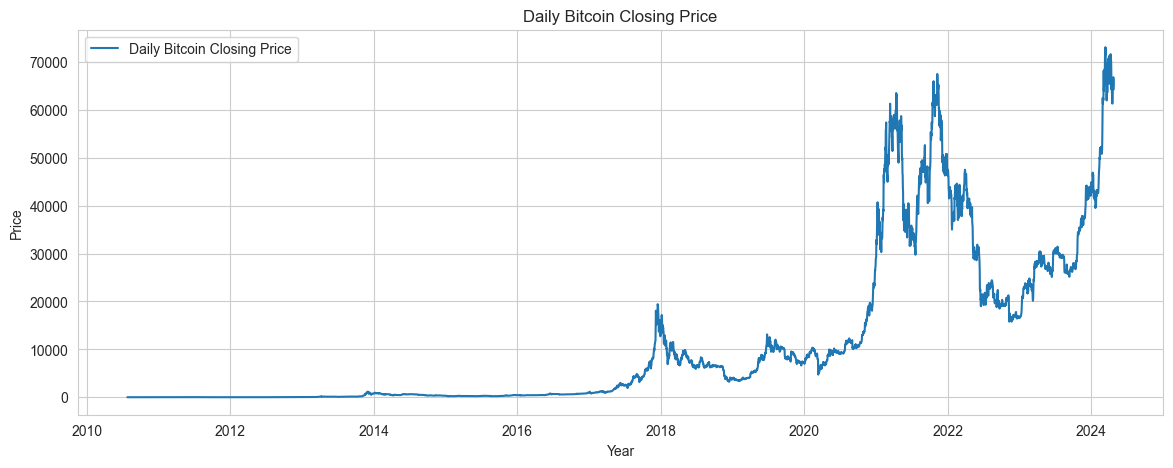

In [4]:
plt.figure(figsize=(14, 5))
# plt.plot(df['Close'], label= 'Close Price')
plt.plot( dfBitcoin['Close'], label= 'Daily Bitcoin Closing Price')
plt.title('Daily Bitcoin Closing Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# --------Gold-------------

## Set Gold Price from 2010 till now

In [5]:
dfGold = pd.read_csv('../dataset/Gold/daily/Gold_2000_2024.csv')

# print ("Preview of the data:")
# print (df.head())
dfGold['Date'] = pd.to_datetime(dfGold['Date'])
print (type(dfGold['Date'][0]))

dfGold.set_index('Date', inplace=True)

specific_date = '2010-07-27'  # Change this to your desired date
dfGold = dfGold.loc[specific_date:]
print ("After data:")
print (dfGold.head())
print ("data.describe:")
print (dfGold.describe())

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
After data:
                   Open         High          Low        Close  Volume
Date                                                                  
2010-07-27  1158.000000  1158.000000  1158.000000  1158.000000      29
2010-07-28  1160.400024  1160.400024  1160.400024  1160.400024  206828
2010-07-29  1163.800049  1169.199951  1158.699951  1168.400024   54384
2010-07-30  1168.199951  1183.099976  1166.000000  1181.699951    5466
2010-08-02  1183.400024  1191.800049  1174.699951  1183.400024    2504
data.describe:
              Open         High          Low        Close         Volume
count  3466.000000  3466.000000  3466.000000  3466.000000    3466.000000
mean   1514.599365  1522.137450  1506.730526  1514.482284    5350.030871
std     285.105481   286.877341   283.443725   285.133696   28912.767315
min    1053.699951  1062.000000  1046.199951  1050.800049       0.000000
25%    1269.199951  1273.925018  1263.850037  1269.224976   

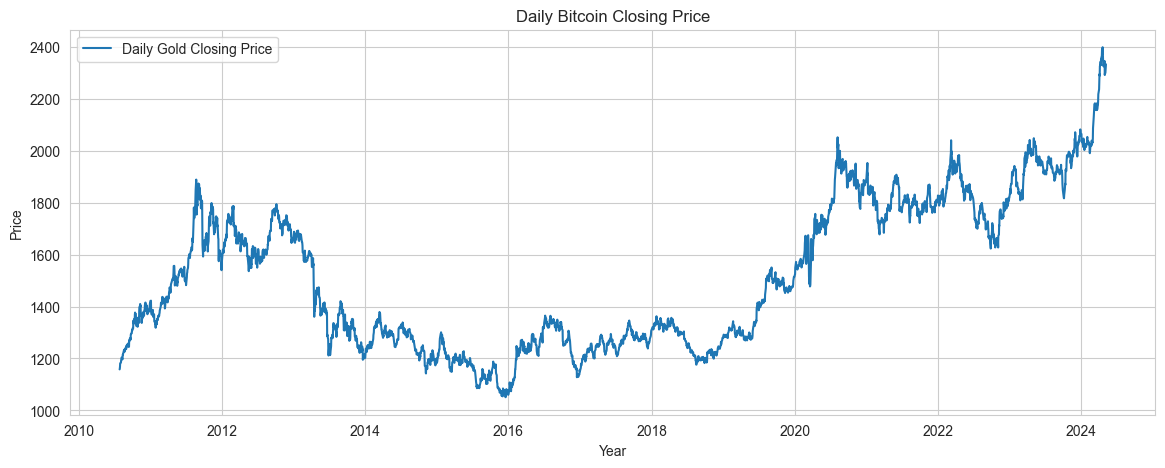

In [6]:
plt.figure(figsize=(14, 5))
# plt.plot(df['Close'], label= 'Close Price')
plt.plot( dfGold['Close'], label= 'Daily Gold Closing Price')
plt.title('Daily Bitcoin Closing Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# --------Gold on Bitcoin-----------

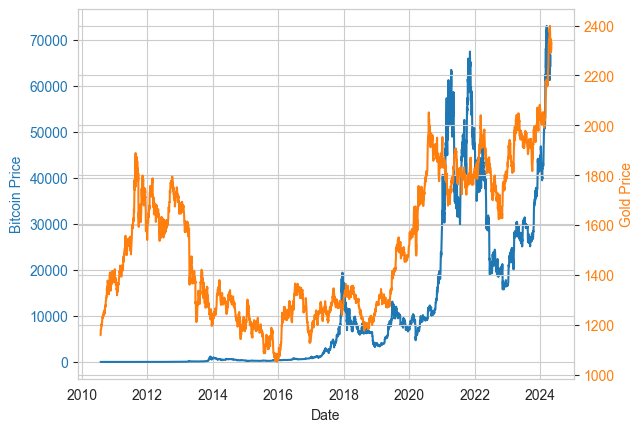

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price', color=color)
ax1.plot(dfBitcoin.index, dfBitcoin['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
dfBitcoin.head()

# Create a second y-axis for Gold data
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Gold Price', color=color)
ax2.plot(dfGold.index, dfGold['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.figure(figsize=(30, 5))
# plt.title('Bitcoin and Gold Prices')
plt.show()

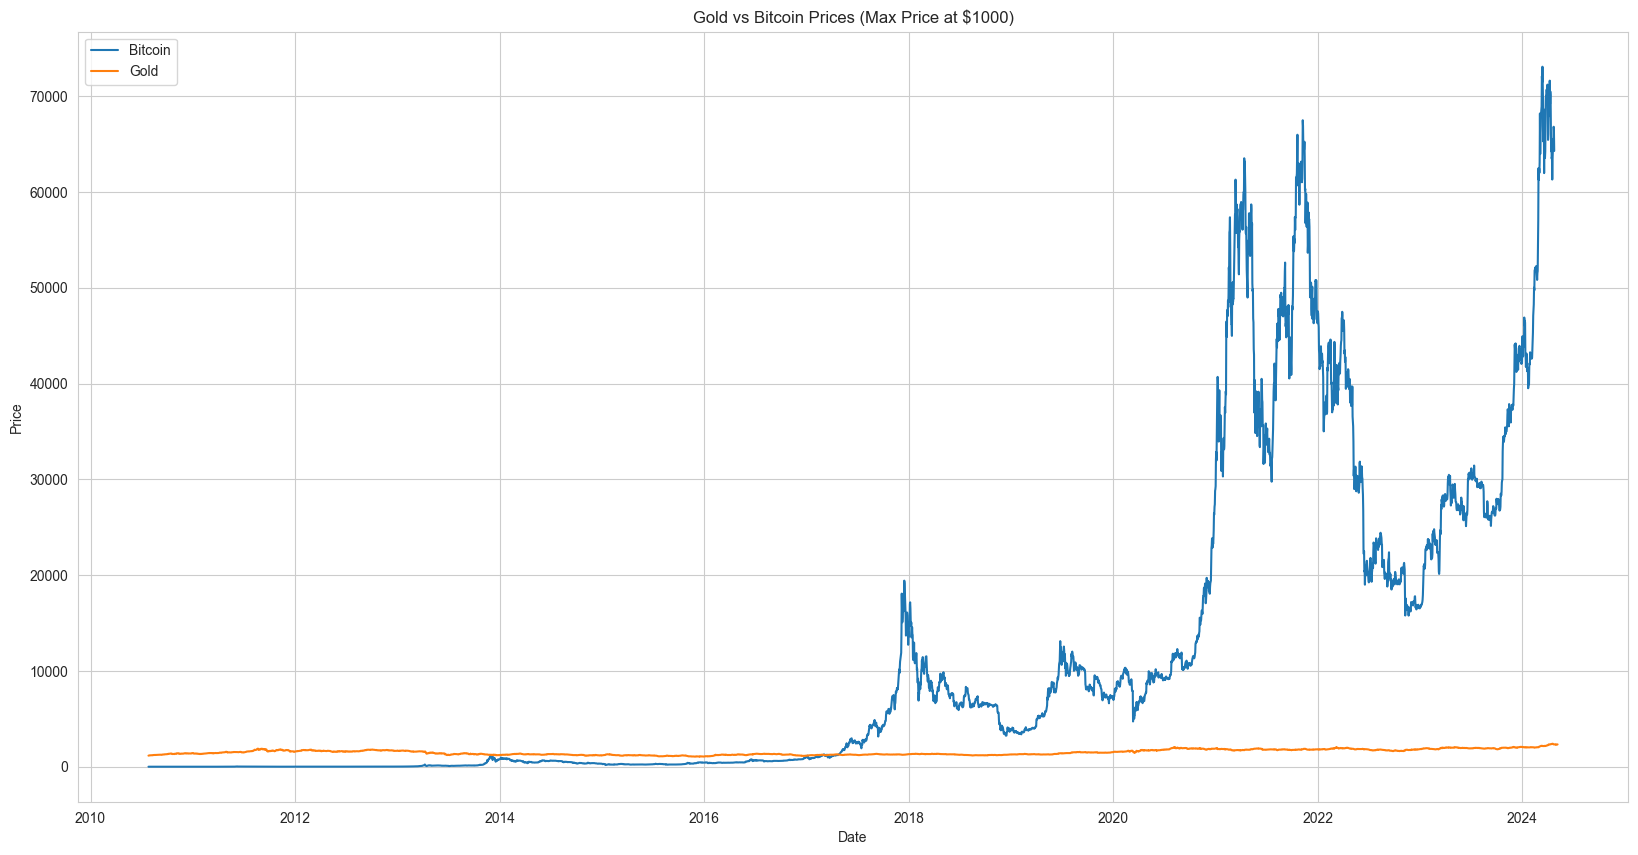

In [8]:
# mn) at 1000$
dfBitcoinBound = dfBitcoin[dfBitcoin['Close'] <= 80000]# plot the gold over bitcoin price but with max price (y colu
plt.ion()  # Turn on interactive mode

# dfBitcoin.head() 
plt.figure(figsize=(20,10))
plt.plot(dfBitcoinBound.index, dfBitcoinBound['Close'], label='Bitcoin')

plt.plot(dfGold.index, dfGold['Close'],label='Gold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold vs Bitcoin Prices (Max Price at $1000)')
plt.legend()

# -Bitcoin on Events-

# Shock events 
## Find all 